#Breast Cancer Prediction Model
The early and accurate diagnosis of breast cancer is critical for improving patient
survival rates. While machine learning models can predict whether a tumor is
malignant or benign with high accuracy, their "black box" nature is a major barrier to
clinical adoption. Doctors need to trust and understand why a model makes a
specific recommendation. This project tackles this challenge by not only creating
an accurate diagnostic model but also making its decision-making process
transparent and explainable. The goal is to develop a trustworthy AI tool that can
serve as a reliable aid to medical professionals.

##Loading , Inspecting and Understanding the data
Here we are going to observe the data for missing values , categorical values for feature engineeering and understand the data for creating the perfect model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive')
except ImportError:
    print("Not running in Colab, skipping Google Drive mount.")

In [ ]:
data = pd.read_csv('../data/breast_cancer_updated.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,2,B,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
2,3,B,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
3,4,M,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
4,5,B,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(5015, 32)

No Null Values in any column

In [ ]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
print(data.duplicated().sum()) # No duplicate data

0


In [ ]:
data['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
M,0.627916
B,0.372084


##Analyzing Column Correlations and Identifying Leakage Risks
To understand feature relationships and identify potential target leakage, we'll one-hot encode categorical variables and compute the correlation matrix. Target leakage is when training data includes information not available at prediction time, leading to inflated performance.

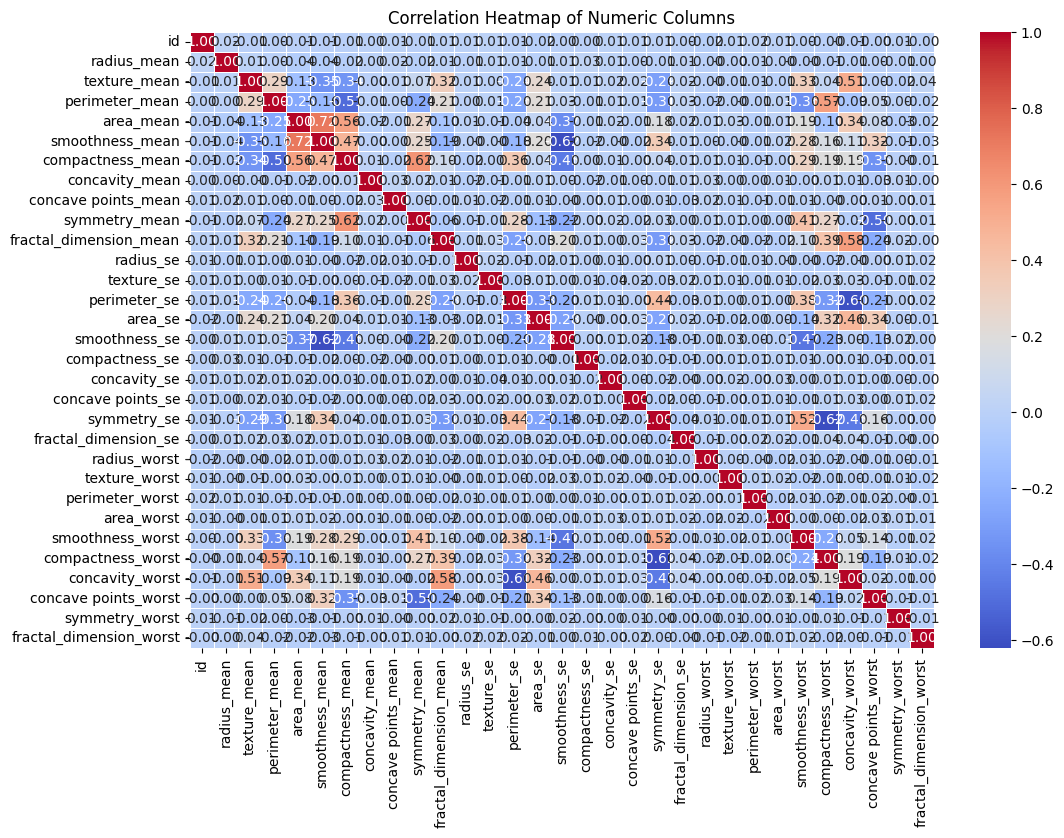

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X=data.drop('diagnosis',axis=1)
X_const = sm.add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

print(vif.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    Feature       VIF
3              texture_mean       inf
6           smoothness_mean       inf
5                 area_mean       inf
4            perimeter_mean       inf
7          compactness_mean       inf
14             perimeter_se       inf
10            symmetry_mean       inf
11   fractal_dimension_mean       inf
15                  area_se       inf
26         smoothness_worst       inf
29     concave points_worst       inf
28          concavity_worst       inf
27        compactness_worst       inf
16            smoothness_se       inf
20              symmetry_se       inf
0                     const  5.031369
13               texture_se  1.006683
18             concavity_se  1.006171
8            concavity_mean  1.005853
23            texture_worst  1.005412
21     fractal_dimension_se  1.005403
25               area_worst  1.005065
31  fractal_dimension_worst  1.004978
9       concave points_mean  1.004438
12                radius_se  1.004230
2           

##Observation and decision based on above analysis
Observation

*   diagnosis values as the target value has a binary nature so we will do one hot encoding there.
*   'ID' is non-informative and will be dropped.
*   We checked for the multicolieanearity in the features which yielded VIF `inf` for a lot of features , but having importance in predicting the target vales makes us not drop these features. A significant fall in the recall value is observed on dropping these features which is a key metrics in our model.


Decision

*   The Diagnosis has been one hot encoded M as 1 and B as 0
*   we dropped the 'id' column.


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,...,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000,5015.000000
mean,-0.000891,-0.554704,-0.554793,-0.936175,-1.391810,-0.461217,0.020568,-0.014652,-0.382991,0.000486,...,-0.003297,-0.000903,0.004424,0.016437,0.096786,-0.601251,-1.163577,0.942990,0.004778,0.013303
std,0.983444,2.232376,2.279260,2.136099,4.579244,5.125060,0.993755,1.001308,2.421989,2.331952,...,1.009491,0.997232,0.999153,1.001357,4.892818,3.956635,4.988837,2.258585,1.020893,0.998287
min,-3.464809,-7.436473,-10.236226,-6.633334,-16.006729,-14.309880,-3.153111,-3.940008,-7.928758,-6.613662,...,-3.265189,-3.398329,-4.462969,-4.157734,-18.136646,-12.322504,-19.097130,-8.552676,-3.726141,-3.189730
25%,-0.660010,-2.190959,-2.228786,-2.418635,-4.516750,-4.402932,-0.653703,-0.691080,-2.089479,-1.654903,...,-0.675835,-0.679178,-0.655660,-0.664391,-3.020663,-3.517564,-4.344667,-0.445038,-0.683277,-0.663630
50%,0.013061,-0.483064,-0.575160,-1.068058,-1.825548,-1.052080,0.026035,-0.007397,-0.511122,-0.189175,...,-0.005330,0.000111,0.002287,0.013695,-0.459011,-0.762428,-1.031261,1.065268,-0.005255,0.003797
75%,0.665335,1.099535,1.034569,0.392419,1.401192,3.593830,0.678656,0.650388,1.295651,1.608768,...,0.688463,0.659223,0.669203,0.679717,2.884154,2.126546,2.082857,2.523148,0.678558,0.716549
max,3.760155,6.006848,6.054870,7.201103,14.436964,15.157340,3.766180,3.712795,9.168892,9.499183,...,3.495113,3.766234,3.446213,3.228377,22.703337,13.225678,15.149747,8.403283,3.471549,3.112841


In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.425053,5.965067,1.878999,-1.922577,-8.191107,-9.662919,-0.619291,-1.315248,-4.107378,3.530545,...,0.615896,2.002757,-0.201908,0.120528,0.035929,-0.582654,10.078263,3.396570,-0.474207,0.938795
1,-0.720491,1.122032,0.702666,0.588757,-2.897603,6.737809,0.293614,-2.898675,2.812344,0.106504,...,-1.545681,0.131865,-1.040233,-0.323723,1.218420,0.165080,0.415971,-2.714283,2.652932,-0.403200
2,1.624526,0.466168,1.600550,2.200664,4.272945,2.390065,0.614031,-0.314448,1.867168,-1.968751,...,-0.118669,-1.379621,-1.324658,-0.282837,5.802867,-0.325060,-4.156908,1.968221,-0.054791,0.076663
3,-1.124956,-2.165492,-0.215090,-1.795210,-6.011122,-7.283305,0.147977,-1.520045,-4.330120,-2.713016,...,1.001215,0.350980,-0.173384,1.782559,-2.723687,-6.602257,-8.789461,5.394188,0.201087,-0.310054
4,-0.349488,-1.915211,-2.885086,-0.182034,1.586092,1.645780,-0.532385,-1.009785,-1.919263,-1.043254,...,-0.538012,1.444644,0.758448,-0.303827,4.672285,-5.195357,-3.044978,1.988163,-0.465882,-0.207049


## Data preparation complete
The data has been successfully preprocessed , including encoding categorical target value , as the data has no missing values there was no need of that preparation and the numeric features were already scaled so feature engineering was also not needed.

##Spliting Data
Now, we split the preprocessed data into training and testing sets using `train_test_split`.We use stratification to ensure that the proportion of `Diagnosis` categories is the same in both the training and testing sets.A `random_state` is set for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts(normalize=True))

(4012, 30)
(1003, 30)
diagnosis
1    0.627866
0    0.372134
Name: proportion, dtype: float64


##Creating and testing Models
We are now going to create different models like `Logistic Regression` , `Random Forest` and `XGBoost` . After which we will compare all the models on the basis of evaluation metrices like recall , accuracy , precision etc.

# **Logistic Regression**


#### Logistic Regression(Train Set)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Logistic Regression(Test Set)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
y_test

,diagnosis
4400,0
1816,1
2368,1
3949,1
2537,1
...,...
3826,0
4823,1
1849,1
2807,1


####Evaluation Matrix


*   Accuracy
*   Recall
*   Precision
*   F1 Score
*   ROC-AUC Score
*   Confusion Matrix
*   Classification Report
*   Threshold Adjustment




In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_roc_auc = roc_auc_score(y_test, y_pred)
print('Accuracy:', log_reg_accuracy)
print('Recall:', log_reg_recall)
print('Precision:', log_reg_precision)
print('F1 Score:', log_reg_f1)
print('ROC AUC Score:', log_reg_roc_auc)

Accuracy: 0.9272183449651047
Recall: 0.9492063492063492
Precision: 0.9358372456964006
F1 Score: 0.9424743892829
ROC AUC Score: 0.9196433890803863


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       373
           1       0.94      0.95      0.94       630

    accuracy                           0.93      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.93      0.93      0.93      1003



<Axes: >

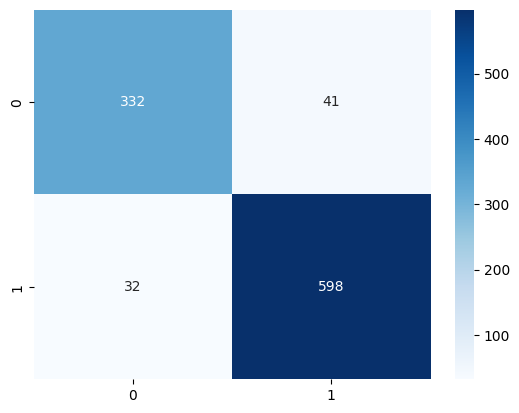

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Step 1: Grid Search with class_weight balanced
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],        # Regularization strength
    'penalty': ['l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Step 2: Evaluate
y_pred = best_lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_lr.predict_proba(X_test)[:,1]))



Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
 [[339  34]
 [ 47 583]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       373
           1       0.94      0.93      0.94       630

    accuracy                           0.92      1003
   macro avg       0.91      0.92      0.91      1003
weighted avg       0.92      0.92      0.92      1003

ROC-AUC Score: 0.9724115919826376


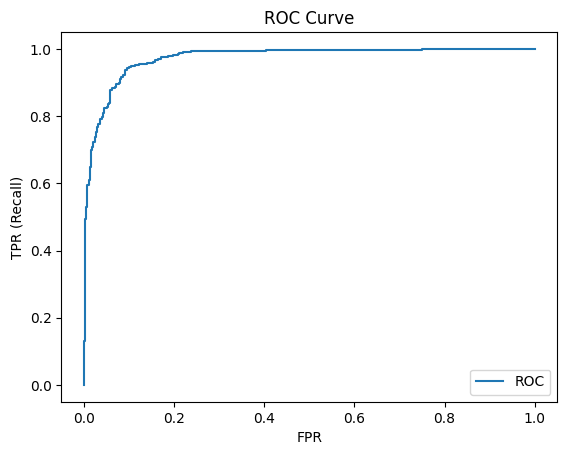


Confusion Matrix at threshold=0.4:
 [[334  39]
 [ 32 598]]

Classification Report at threshold=0.4:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       373
           1       0.94      0.95      0.94       630

    accuracy                           0.93      1003
   macro avg       0.93      0.92      0.92      1003
weighted avg       0.93      0.93      0.93      1003


Accuracy: 0.9292123629112662
Recall: 0.9492063492063492
Precision: 0.9387755102040817
F1 Score: 0.9439621152328335
ROC-AUC Score: 0.9223243542278395


In [ ]:
# Step 3: Threshold adjustment (optional)
y_prob = best_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC to find good threshold
plt.plot(fpr, tpr, label="ROC")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Example: set threshold = 0.4
threshold = 0.4
y_pred_thresh = (y_prob >= threshold).astype(int)

print("\nConfusion Matrix at threshold=0.4:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report at threshold=0.4:\n", classification_report(y_test, y_pred_thresh))

log_reg_accuracy = accuracy_score(y_test, y_pred_thresh)
log_reg_recall = recall_score(y_test, y_pred_thresh)
log_reg_precision = precision_score(y_test, y_pred_thresh)
log_reg_f1 = f1_score(y_test, y_pred_thresh)
log_reg_roc_auc = roc_auc_score(y_test, y_pred_thresh)

print("\nAccuracy:", log_reg_accuracy)
print("Recall:", log_reg_recall)
print("Precision:", log_reg_precision)
print("F1 Score:", log_reg_f1)
print("ROC-AUC Score:", log_reg_roc_auc)


# **Random Forest**

In [ ]:
# --- 1. Import Libraries ---
from sklearn.ensemble import RandomForestClassifier

# --- 2. Prepare Data ---
X = data.drop('diagnosis', axis=1)  # features
y = data['diagnosis']               # target column

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Initialize Random Forest ---
rf = RandomForestClassifier(
    n_estimators=100,          # number of trees
    class_weight='balanced',   # handle class imbalance
    oob_score=True,            # enable out-of-bag score
    random_state=42
)

# --- 4. Train the Model ---
rf.fit(X_train, y_train)

# --- 5. Check OOB Score ---
print("OOB Score:", rf.oob_score_)

# --- 6. Evaluate on Test Set ---
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


OOB Score: 0.9638584247258225

Confusion Matrix:
 [[350  23]
 [ 11 619]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       373
           1       0.96      0.98      0.97       630

    accuracy                           0.97      1003
   macro avg       0.97      0.96      0.96      1003
weighted avg       0.97      0.97      0.97      1003

ROC-AUC Score: 0.9914507000297885


### **FEATURE IMPORTANCE**

---

*  "Random Forest Classifier's Feature Importance" using Barplot for figuring out top features of importance.



/tmp/ipython-input-2070089454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


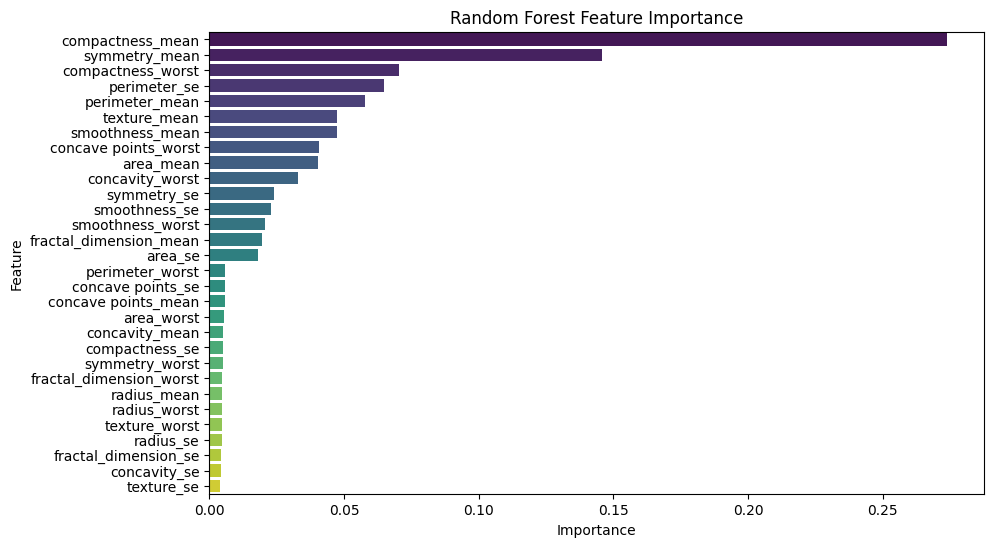


Top 10 features by importance:
                  Feature  Importance
5       compactness_mean    0.274041
8          symmetry_mean    0.145820
25     compactness_worst    0.070296
12          perimeter_se    0.064998
2         perimeter_mean    0.057682
1           texture_mean    0.047397
4        smoothness_mean    0.047230
27  concave points_worst    0.040585
3              area_mean    0.040365
26       concavity_worst    0.032825


In [ ]:
# --- 1. Create Feature Importance DataFrame ---
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- 2. Plot Feature Importance ---
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- 3. Print Top Features ---
print("\nTop 10 features by importance:\n", feature_importance.head(10))


### **PERMUTATION IMPORTANCE**

---



*   Top features of Permutation Importance provided by "Random Forest Classifier's Permutation Importance".

/tmp/ipython-input-1643478921.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_df, palette='magma')


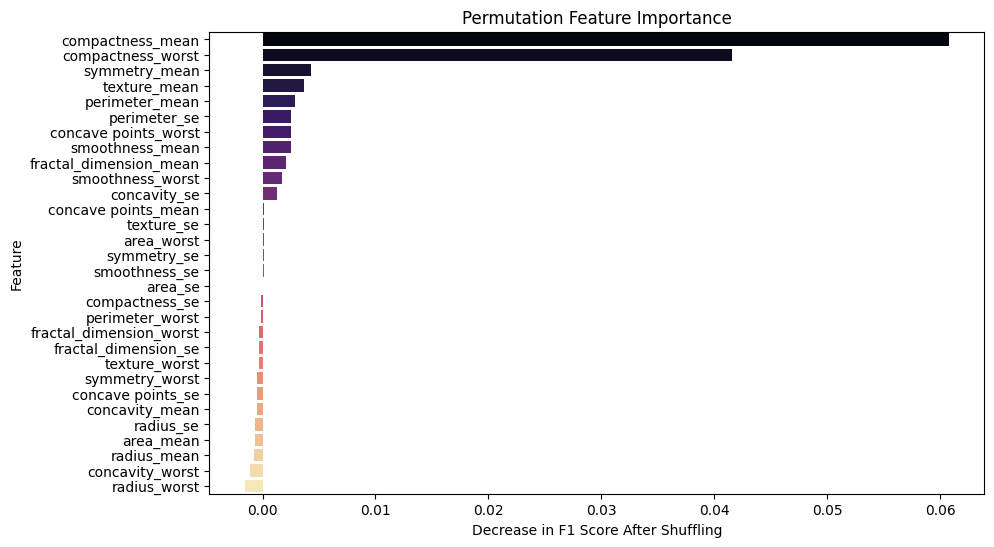


Top 10 features by permutation importance:
                    Feature  Importance
5         compactness_mean    0.060794
25       compactness_worst    0.041587
8            symmetry_mean    0.004286
1             texture_mean    0.003651
2           perimeter_mean    0.002857
12            perimeter_se    0.002540
27    concave points_worst    0.002540
4          smoothness_mean    0.002540
9   fractal_dimension_mean    0.002063
24        smoothness_worst    0.001746


In [ ]:
# --- 1. Import Libraries ---
from sklearn.inspection import permutation_importance

# --- 2. Compute Permutation Importance ---
perm_importance = permutation_importance(
    rf,                  # trained Random Forest
    X_test,              # test features
    y_test,              # true labels
    n_repeats=10,        # number of times to shuffle each feature
    random_state=42,
    scoring='recall'
)

# --- 3. Create DataFrame ---
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# --- 4. Plot Permutation Feature Importance ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette='magma')
plt.title("Permutation Feature Importance")
plt.xlabel("Decrease in F1 Score After Shuffling")
plt.ylabel("Feature")
plt.show()

# --- 5. Print Top Features ---
print("\nTop 10 features by permutation importance:\n", perm_df.head(10))


###**HyperParameter Tuning - Using RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,   # only 30 random combos instead of full grid
    cv=3,
    scoring='recall',  # directly optimize recall
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print(random_search.best_params_)



{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:


best_rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=15,
    class_weight='balanced',  # optional, to improve recall
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_split=5, n_jobs=-1,
                       random_state=42)

### **EVALUATION METRICS & CLASSIFICATION REPORT**

---
It contains:-

1.   **CONFUSION MATRIX** - Segregation on TP, TN, FP, FN.

2.  **CLASSIFICATION REPORT** - Precision, Recall, F1-score, (Support- No.of malignant & benign).

3. **ROC CURVE , ROC-AUC , PR-AUC** - Probabilty of malignancy, best differentiator between Positive/Negative cases.

4. **(Gini Based) Feature Importance Classifier**.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy1 = accuracy_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred_proba)

print("\nAccuracy: ", accuracy1)
print("\nRecall: ", recall1)
print("\nPrecision: ", precision1)
print("\nF1 Score: ", f1_1)
print("\nROC-AUC Score: ", roc_auc1)



Confusion Matrix:
 [[348  25]
 [ 10 620]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       373
           1       0.96      0.98      0.97       630

    accuracy                           0.97      1003
   macro avg       0.97      0.96      0.96      1003
weighted avg       0.97      0.97      0.96      1003


Accuracy:  0.9651046859421735

Recall:  0.9841269841269841

Precision:  0.9612403100775194

F1 Score:  0.9725490196078431

ROC-AUC Score:  0.9906953487382442


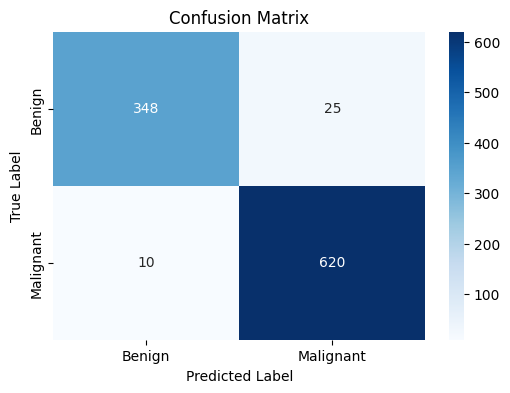

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

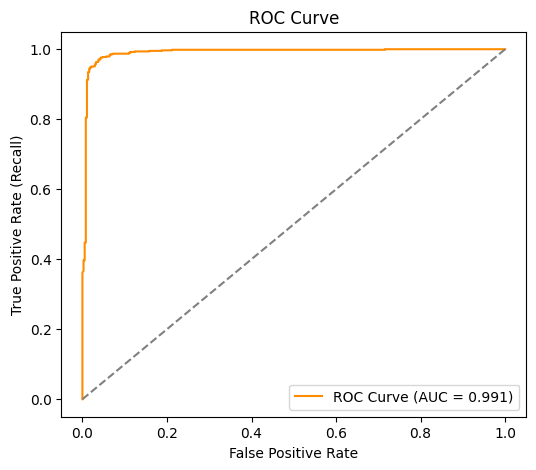

In [ ]:
# 2️⃣ ROC Curve
y_pred_proba = best_rf.predict_proba(X_test)[:,1]   # probability of malignant
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='darkorange')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

PR-AUC: 0.9932649086179591


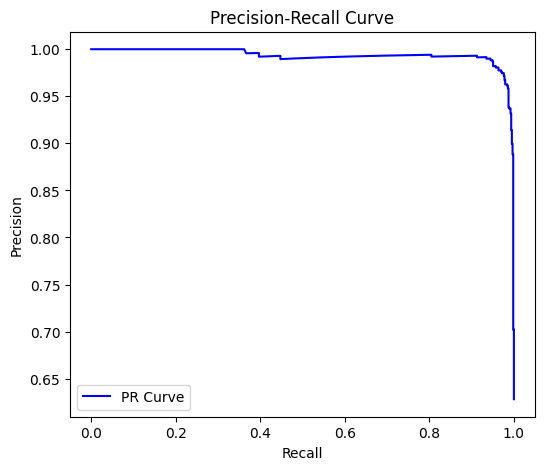

In [ ]:
# 3️⃣ Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

*   **Feature Importance** classification done after **Hyperparameter Tuning** - ***Gini Based*** (Random forest decision tree uses this impurity measure for specificity)

/tmp/ipython-input-3501755216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


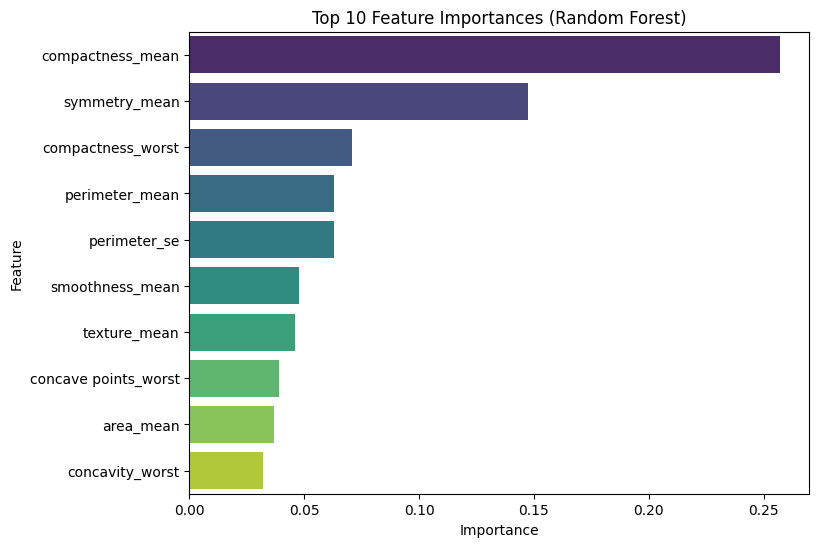

In [ ]:
# 4️⃣ Feature Importance (Gini-based)
importances = best_rf.feature_importances_
indices = importances.argsort()[::-1][:10]  # top 10 features

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**THRESHOLD TUNING**


*   F1 VS Threshold - Identifying best Threshold to which it goes for most high & accurate Metrics meaurement.

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 1.0, 0.05)  # thresholds from 0.1 to 0.95
results = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append([t, precision, recall, f1])

# Convert to array for easy plotting
results = np.array(results)


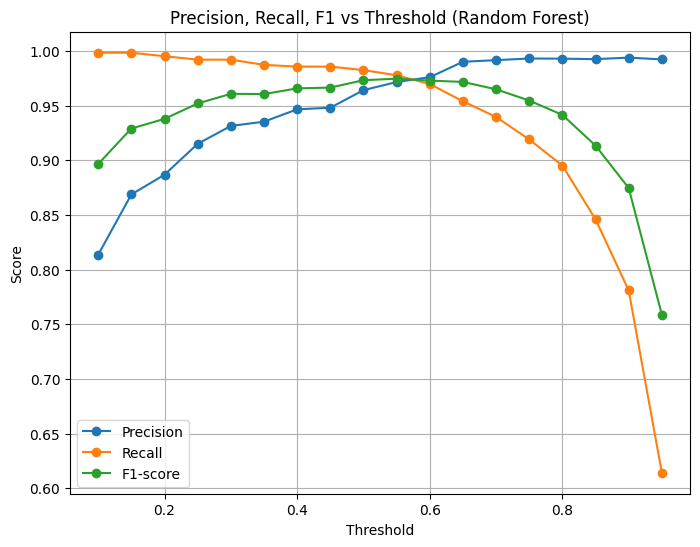

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(results[:,0], results[:,1], label='Precision', marker='o')
plt.plot(results[:,0], results[:,2], label='Recall', marker='o')
plt.plot(results[:,0], results[:,3], label='F1-score', marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


##### **Now that we get 0.4. as the threshold (After Threshold Tuning)** , we use this for ***`Confusion Matrix`***,***`Classification Report`***, ***`Roc-Auc-Score`***

In [ ]:
# Predict with threshold 0.4
y_pred_thresh = (y_prob >= 0.4).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion Matrix
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix:\n", cm_thresh)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("\n")
print("\nRecall:", recall_score(y_test, y_pred_thresh))
print("\nPrecision:", precision_score(y_test, y_pred_thresh))
print("\nF1-Score:", f1_score(y_test, y_pred_thresh))
# ROC-AUC (unchanged, threshold doesn’t affect AUC)
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))








Confusion Matrix:
 [[338  35]
 [  9 621]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       373
           1       0.95      0.99      0.97       630

    accuracy                           0.96      1003
   macro avg       0.96      0.95      0.95      1003
weighted avg       0.96      0.96      0.96      1003




Recall: 0.9857142857142858

Precision: 0.9466463414634146

F1-Score: 0.9657853810264385

ROC-AUC Score: 0.9914507000297885


# **XGBoost**

#### XGBoost(Train Set)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import joblib

# now we intialize the xgboost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

best_xgb_model = random_search.best_estimator_

y_pred_train = best_xgb_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print(f"\n📊 Training Accuracy: {train_acc:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Best Hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.7}

📊 Training Accuracy: 0.9995


#### XGBoost(Test Set)

In [ ]:
#Here we are loading the saved data
  # convert to Series

y_pred =  best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# All the evaluation metrices
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_proba)

print("\n📊 XGBoost Test Results:")
print(f"Accuracy : {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall   : {recall2:.4f}")
print(f"F1-Score : {f1_2:.4f}")
print(f"ROC-AUC  : {roc_auc2:.4f}")

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

# Confusion metrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(cm)


📊 XGBoost Test Results:
Accuracy : 0.9691
Precision: 0.9702
Recall   : 0.9810
F1-Score : 0.9755
ROC-AUC  : 0.9924

🧾 Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.95      0.96       373
      Benign       0.97      0.98      0.98       630

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003


 Confusion Matrix:
[[354  19]
 [ 12 618]]


####Evaluation metrices



*   Confusion Matrix
*   ROC-curve
*   Precision-recall curve








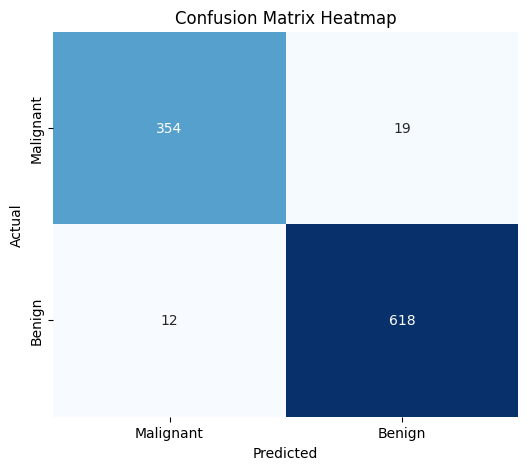

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = best_xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


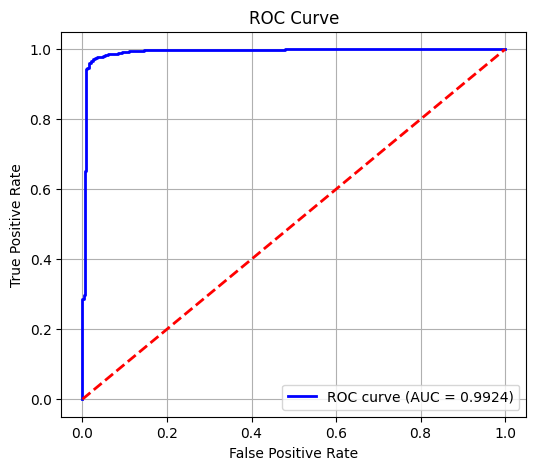

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


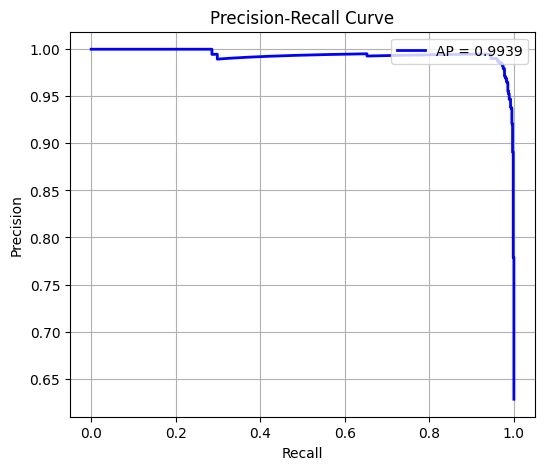

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = best_xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# **SHAP VALUES**

SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. It assigns each feature an importance value for a particular prediction by computing Shapley values from cooperative game theory.

Key ideas:

Local explanations: SHAP explains individual predictions by showing how each feature contributes positively or negatively to the model’s output.

Global understanding: By aggregating SHAP values across many samples, we can understand which features are generally the most important in driving predictions.

Consistency & fairness: Unlike some other feature importance methods, SHAP ensures consistency (if a feature contributes more across all models, its SHAP value will not decrease) and provides a fair distribution of contributions among features.

Model-agnostic and model-specific: SHAP can be applied to any model (black-box or white-box) and also has optimized implementations for tree-based models like Random Forest and XGBoost.

In [ ]:
import shap   # Loads the SHAP library, which provides tools to compute Shapley values.
shap.initjs() # Initializes JavaScript visualization support inside the notebook. This is required for rendering SHAP plots (force plots, dependence plots, etc.).

In [ ]:
explainer = shap.TreeExplainer(best_rf) # Creates a SHAP TreeExplainer specifically designed for tree-based models such as Random Forest and XGBoost.
shap_values = explainer(X_test)         # Computes SHAP values for each prediction in the test dataset.

####Bar Plot

*   Purpose


1. Creates a bar plot of the top 11 features ranked by their mean absolute SHAP values.
2.  Mean absolute SHAP values indicate overall importance: how much, on average, a feature contributes to the prediction, regardless of direction (positive or negative influence).
3. This bar plot helps us prioritize the most influential features driving malignant predictions. Clinically, it highlights which tumor characteristics are most associated with malignancy in our dataset.





*   Interpretation

1. Features at the top of the bar chart (e.g., symmetry_mean, compactness_worst, compactness_mean) have the highest impact on the model’s prediction of malignancy.

2. Lower-ranked features contribute less to prediction and may be considered for dimensionality reduction or further analysis.











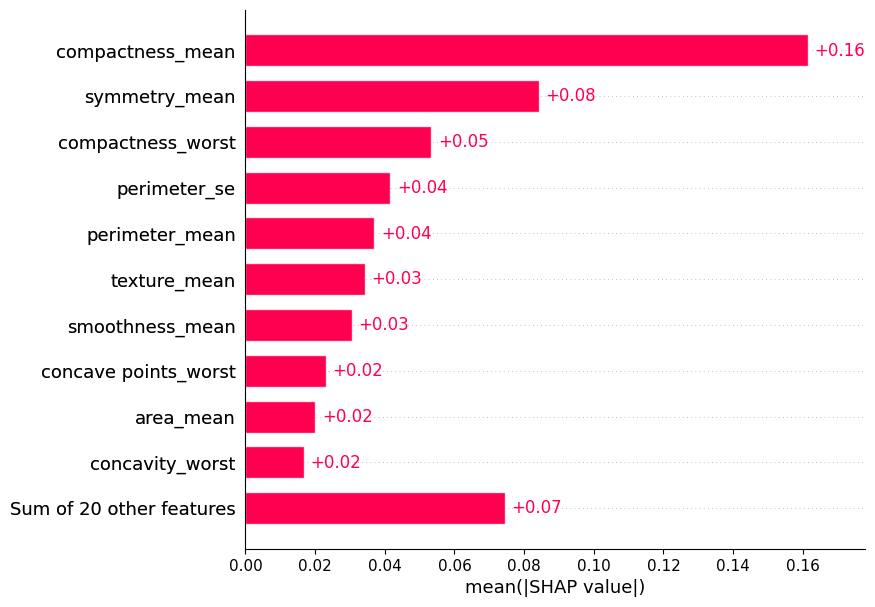

In [ ]:
shap_values_class1 = shap_values[..., 1]

shap.plots.bar(shap_values_class1, max_display=11)


####Beeswarm Plot


*  Purpose

The code shap.plots.beeswarm(shap_values_class1, max_display=11) generates a SHAP beeswarm plot, which is a powerful summary plot used to explain the output of a machine learning model. Its primary purposes are:

1. Global Feature Importance: To rank features based on the magnitude of their impact on the model's predictions. Features at the top of the plot are the most influential.

2. Feature Effect and Direction: To show not only if a feature is important, but also how its value affects the prediction. It reveals the direction (positive or negative) and magnitude of a feature's impact for every individual prediction in the dataset.

3. Model Behavior Summary: To visualize the relationship and consistency of the impact of each feature across all data points.



*   Interpretation

This plot reveals the top features driving the model's predictions for "Class 1". The most important feature is compactness_mean.

Each dot is a single prediction. Its horizontal position shows its impact on the output, and its color shows the feature's value (blue=low, red=high).


* Right Side (Positive Impact): Pushes the prediction towards "Class 1".
* Left Side (Negative Impact): Pushes the prediction away from "Class 1".




The key takeaway is that the model has learned two types of relationships:

Inverse Relationship: For the most important features (compactness_mean, symmetry_mean, compactness_worst, perimeter_se), lower values (blue dots) increase the probability of "Class 1".

Direct Relationship: For other key features like perimeter_mean and texture_mean, higher values (red dots) increase the probability of "Class 1".







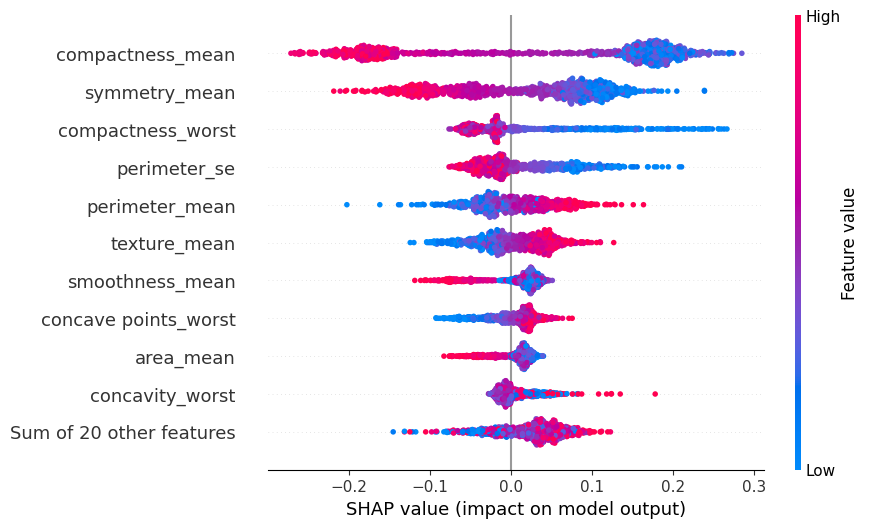

In [ ]:
shap.plots.beeswarm(shap_values_class1, max_display=11)


####Waterfall Plot


*   Purpose

The code generates a SHAP waterfall plot to explain a single, individual prediction. Unlike the beeswarm plot which provides a global summary of the entire model, the waterfall plot offers a detailed, local explanation for one specific data point.

Its purpose is to show exactly how the model arrived at its final prediction for this instance by visualizing:

1. A base value, which is the average prediction across the entire dataset.

2. How each feature's specific value contributes to pushing the prediction higher or lower.

3. The final prediction score that results from these contributions.

*  Interpretation

This plot tells the story of how the model moved from the average prediction to the final prediction for this specific instance.



*   Starting Point (Base Value): At the bottom, E[f(x)] = 0.5 is the
average prediction for Class 1 over all data. This is the model's starting point before considering any features of this particular instance.
*   Final Prediction (Output Value): At the top, f(x) = 0.558 is the final probability score the model assigned to this instance for Class 1. The goal is to explain the journey from 0.5 to 0.558.





Feature Contributions: Each bar shows how a feature's value for this instance pushed the prediction up or down.

Key Drivers for this Prediction:

*  Positive Drivers (Red Bars - Increasing the Score):
The most significant factor was compactness_worst. Its value of -6.471 had the largest positive impact, increasing the score by +0.14.
Other features pushing the prediction higher were symmetry_mean (+0.07) and compactness_mean (+0.07).


* Negative Drivers (Blue Bars - Decreasing the Score):
The strongest factor pushing the prediction down was area_mean. Its value of 3.001 decreased the score by -0.08. Smoothness_mean also had a significant negative impact (-0.07).


















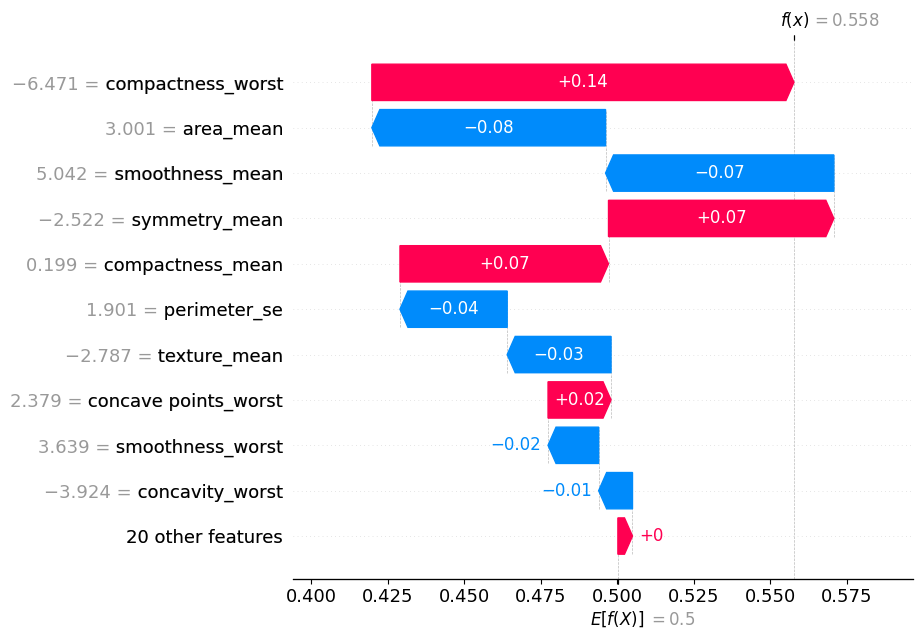

In [ ]:
# Take SHAP values for class 1 (positive class)
shap_values_class1 = shap_values[..., 1]

# Waterfall plot
shap.plots.waterfall(shap_values_class1[0], max_display=11)


####Dependence Plot



*    Purpose

This is a SHAP dependence plot. Its primary purpose is to provide a detailed, focused view of the effect of a single feature on the model's predictions.

Unlike the beeswarm plot which summarizes all features, this plot allows for a deeper dive into one feature's behavior. Its key functions are:

1. Visualizing Marginal Effect: It plots a feature's value (compactness_mean) against its corresponding SHAP value, clearly showing how the feature's impact changes as its value changes.

2. Uncovering Interaction Effects: This is the plot's most powerful feature. By coloring the points based on a second feature (symmetry_mean), it reveals how the impact of the primary feature is influenced by another feature in the model. The SHAP library automatically selects the feature with the strongest interaction for coloring.

In this case, the plot shows the effect of compactness_mean on predictions for Class 1 and how that effect is modified by symmetry_mean.



*  Interpretation

1. Main Effect: The plot shows a clear inverse relationship. As compactness_mean (x-axis) increases, its impact on the prediction (y-axis) shifts from positive to negative.




*   Low compactness_mean values increase the probability of "Class 1".
*   High compactness_mean values decrease the probability.



2. Interaction Effect: The color represents the value of symmetry_mean (blue=low, red=high) and reveals an interaction.


* The strongest positive impact occurs when both compactness_mean and symmetry_mean are low (the highest blue dots on the left).
* The strongest negative impact occurs when both compactness_mean and symmetry_mean are high (the lowest red dots on the right).







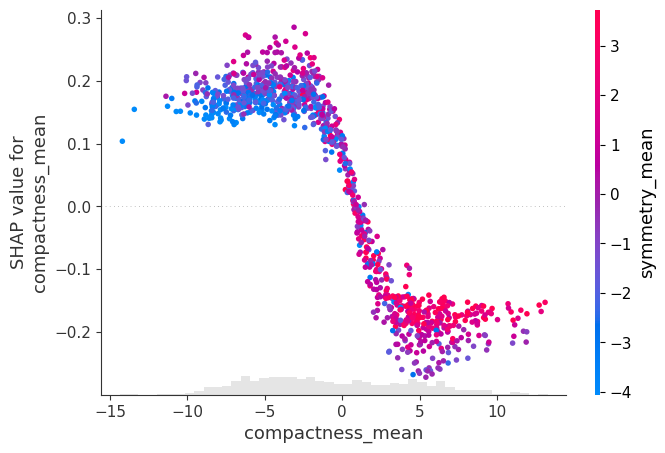

In [ ]:
shap.plots.scatter(shap_values_class1[:, "compactness_mean"], color=shap_values_class1)


# **Comparison of the 3 Models**

In [ ]:
import pandas as pd

# Metrics dictionary (already stored from your models)
log_reg_metrics = {
    "Accuracy": log_reg_accuracy,
    "Precision": log_reg_precision,
    "Recall": log_reg_recall,
    "F1-score": log_reg_f1,
    "AUC": log_reg_roc_auc
}

rf_metrics = {
    "Accuracy": accuracy1,
    "Precision": precision1,
    "Recall": recall1,
    "F1-score": f1_1,
    "AUC": roc_auc1
}

xg_metrics = {
    "Accuracy": accuracy2,
    "Precision": precision2,
    "Recall": recall2,
    "F1-score": f1_2,
    "AUC": roc_auc2
}

# Create DataFrame
df_metrics = pd.DataFrame({
    "Logistic Regression": log_reg_metrics,
    "Random Forest": rf_metrics,
    "XGBoost": xg_metrics
}).T

# Function to highlight max in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Style the table
styled_table = (
    df_metrics.style
    .apply(highlight_max, axis=0)
    .set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', 'red'),
                    ('color', 'black'),
                    ('font-weight', 'bold'),
                    ('text-align', 'center')]}]
    )
    .set_properties(**{'text-align': 'center',
                       'background-color': 'blue',
                       'border': '1px solid black'})
)

styled_table


,Accuracy,Precision,Recall,F1-score,AUC
Logistic Regression,0.929212,0.938776,0.949206,0.943962,0.922324
Random Forest,0.965105,0.961240,0.984127,0.972549,0.990695
XGBoost,0.969093,0.970173,0.980952,0.975533,0.992361
